In [82]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl

%matplotlib inline

In [58]:
df = pd.read_csv('medical_examination.csv')

#### Add an 'overweight' column to the data. To determine if a person is overweight, first calculate their BMI by dividing their weight in kilograms by the square of their height in meters. If that value is > 25 then the person is overweight. Use the value 0 for NOT overweight and the value 1 for overweight.

In [59]:
df['overweight'] = df['overweight'] = df["weight"] / ((df["height"] / 100) ** 2)
df['overweight'] = pd.Series(np.where(df['overweight'] > 25, 1, 0))

#### Normalize data by making 0 always good and 1 always bad. If the value of 'cholestorol' or 'gluc' is 1, make the value 0. If the value is more than 1, make the value 1.

In [60]:
df['cholesterol'] = pd.Series(np.where(df['cholesterol'] > 1, 1, 0))
df['gluc'] = pd.Series(np.where(df['gluc'] > 1, 1, 0))

#### Convert the data into long format and create a chart that shows the value counts of the categorical features using seaborn's catplot(). The dataset should be split by 'Cardio' so there is one chart for each 'cardio' value. The chart should look like "examples/Figure_1.png".

In [61]:
df_fig1 = pd.melt(df, id_vars=["cardio"], value_vars=[
                     "active", "alco", "cholesterol", "gluc", "smoke", "overweight"])
# Adding total seria / column to put the count result into
df_fig1["total"] = 0
df_fig1 = df_fig1.groupby(["variable", "cardio", "value"], as_index=False).count()

In [62]:
labels = df_fig1['variable'].unique().tolist()
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

df_fig1_cardio_0 = df_fig1.loc[(df_fig1['cardio'] == 0)]
fig1_cardio_0_value_0 = df_fig1_cardio_0.loc[(df_fig1_cardio_0['value'] == 0), 'total'].tolist()
fig1_cardio_0_value_1 = df_fig1_cardio_0.loc[(df_fig1_cardio_0['value'] == 1), 'total'].tolist()

df_fig1_cardio_1 = df_fig1.loc[(df_fig1['cardio'] == 1)]
fig1_cardio_1_value_0 = df_fig1_cardio_1.loc[(df_fig1_cardio_1['value'] == 0), 'total'].tolist()
fig1_cardio_1_value_1 = df_fig1_cardio_1.loc[(df_fig1_cardio_1['value'] == 1), 'total'].tolist()

##### plot it with seaborn

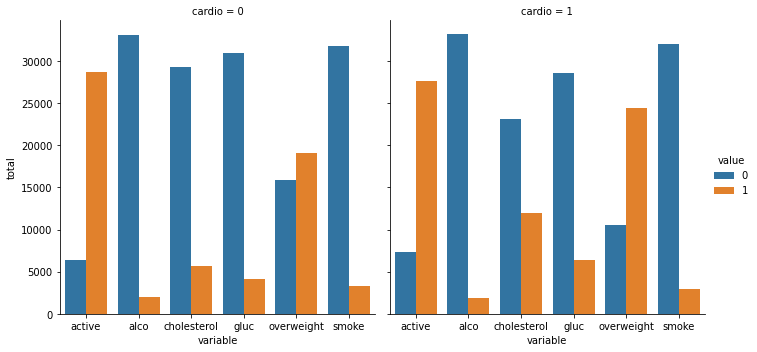

In [63]:
fig = sns.catplot(x="variable", y="total", col="cardio",
                  hue="value", kind="bar", data=df_fig1).fig

##### plot it with matplot lib

(<Figure size 1008x432 with 2 Axes>,
 array([<AxesSubplot:title={'center':'cardio = 0'}, xlabel='variable', ylabel='total'>,
        <AxesSubplot:title={'center':'cardio = 1'}, xlabel='variable'>],
       dtype=object))

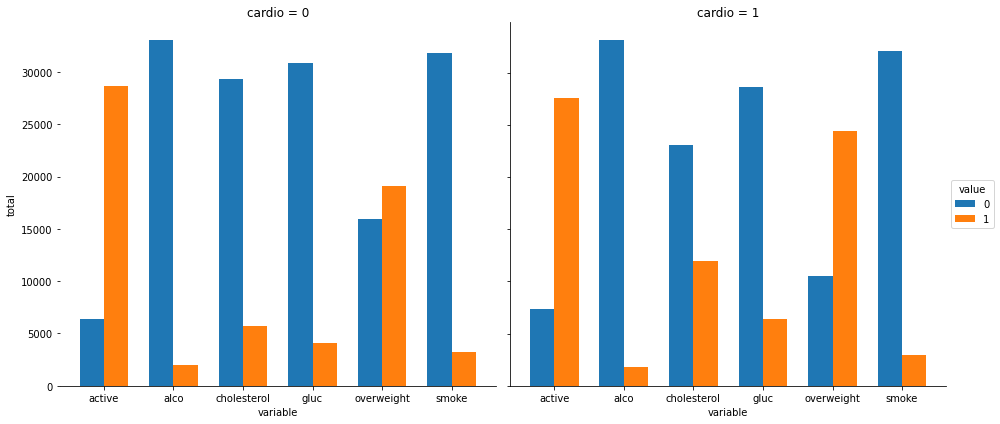

In [64]:
plot_objects = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

fig, ((ax1, ax2)) = plot_objects

rects1 = ax1.bar(x - width/2, fig1_cardio_0_value_0, width, label='0')
rects2 = ax1.bar(x + width/2, fig1_cardio_0_value_1, width, label='1')

ax1.set_xticks(x)
ax1.set_xticklabels(labels)
ax1.set_ylabel('total')
ax1.set_xlabel('variable')
ax1.set_title('cardio = 0')
ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)

ax2_rects1 = ax2.bar(x - width/2, fig1_cardio_1_value_0, width, label='0')
ax2_rects2 = ax2.bar(x + width/2, fig1_cardio_1_value_1, width, label='1')
ax2.set_xlabel('variable')
ax2.set_title('cardio = 1')
ax2.set_xticks(x)
ax2.set_xticklabels(labels)
ax2.set_yticklabels([])
ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="value")
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
fig.tight_layout()

plot_objects 

#### Clean the data. Filter out the following patient segments that represent incorrect data:
* diastolic pressure is higher then systolic (Keep the correct data with df['ap_lo'] <= df['ap_hi']))
* height is less than the 2.5th percentile (Keep the correct data with (df['height'] >= df['height'].quantile(0.025)))
* height is more than the 97.5th percentile
* weight is less then the 2.5th percentile
* weight is more than the 97.5th percentile

In [68]:
df_fig2 = df.loc[
    (df['ap_lo'] <= df['ap_hi']) &
    (df['height'] >= df['height'].quantile(0.025)) & 
    (df['height'] <= df['height'].quantile(0.975)) & 
    (df['weight'] >= df['weight'].quantile(0.025)) & 
    (df['weight'] <= df['weight'].quantile(0.975))
]
df_fig2

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,99991,19699,1,172,70.0,130,90,0,0,0,0,1,1,0
69994,99992,21074,1,165,80.0,150,80,0,0,0,0,1,1,1
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


#### Create a correlation matrix using the dataset. Plot the correlation matrix using seaborn's heatmap(). Mask the upper triangle. The chart should look like "examples/Figure_2.png".

In [71]:
corr = df_fig2.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))

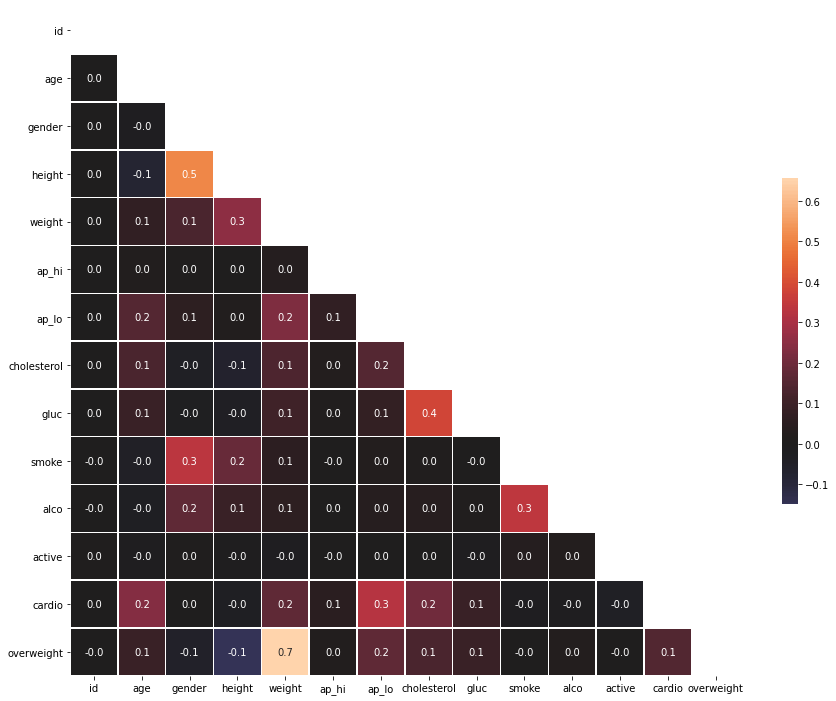

In [76]:
fig, ax = plt.subplots(figsize=(15, 15))

ax = sns.heatmap(
    corr,
    mask=mask,
    fmt='.1f',
    annot=True,
    center=0,
    #vmax=0.32,
    square=True,
    linewidths=.5,
    cbar_kws={"shrink": .4}
)

In [83]:
 actual = [text.get_text() for text in fig.axes[0].get_default_bbox_extra_artists() if isinstance(text, mpl.text.Text)]

In [85]:
len(actual)

91

In [87]:
mask

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False, False, False,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False, False, False, False,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False, False, False, False, False,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False, False, False, False, False, False,  True,
         